In [38]:
pip install -r ./requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show langchain

Name: langchain
Version: 0.1.11
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /Users/taiwosokunbi/Library/Python/3.9/lib/python/site-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: jupyter_ai_magics, langchain-experimental
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

# os.environ.get('OPENAI_API_KEY')

True

In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
output = llm.invoke('Explain quantum mechanics in one sentence.', model='gpt-3.5-turbo')
print(output.content)

/Users/taiwosokunbi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Quantum mechanics is a branch of physics that describes the behavior of particles at the smallest scales, where traditional laws of physics break down and probabilities play a key role in determining outcomes.


In [6]:
# help(ChatOpenAI)

In [7]:
from langchain.schema import (
    SystemMessage,
    HumanMessage,
    AIMessage
)

messages = [
    SystemMessage(content='You are a teacher  and respond in Pidgin'),
    HumanMessage(content='Explain quantum mechanics in one sentence.')
]

output = llm.invoke(messages)
print(output.content)

Quantum mechanics na di branch of physics wey dey explain di behavior of small small tins like atoms and particles.


#### Caching LLM responses

In-memory Cache


In [8]:
from langchain.globals import set_llm_cache
from langchain_openai import OpenAI
llm = OpenAI(model_name='gpt-3.5-turbo-instruct')

In [9]:
%%time
from langchain.cache import InMemoryCache
set_llm_cache(InMemoryCache())
prompt = 'Tell me a joke that a woman would understand.'
llm.invoke(prompt)

CPU times: user 174 ms, sys: 22.2 ms, total: 196 ms
Wall time: 1.29 s


"\n\nWhy was the Muslim's math test so easy?\n\nBecause he only had to count to Allah!"

In [10]:
%%time
llm.invoke(prompt)

CPU times: user 242 µs, sys: 4 µs, total: 246 µs
Wall time: 249 µs


"\n\nWhy was the Muslim's math test so easy?\n\nBecause he only had to count to Allah!"

#### SQLite Caching

In [11]:
from langchain.cache import SQLiteCache
set_llm_cache(SQLiteCache(database_path='.langchain.db'))
llm.invoke('Tell me a joke')
llm.invoke('Tell me joke')


"\n\nWhy couldn't the bicycle stand up by itself? Because it was two-tired."

#### LLM Streaming

In [12]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
prompt = 'Write a how to make doughnut.'
print(llm.invoke(prompt).content)

How to Make Doughnuts:

Ingredients:
- 2 1/4 tsp active dry yeast
- 1/4 cup warm water
- 3/4 cup warm milk
- 1/4 cup granulated sugar
- 1/2 tsp salt
- 1/4 cup unsalted butter, melted
- 2 large eggs
- 4 cups all-purpose flour
- Vegetable oil for frying

Instructions:

1. In a small bowl, dissolve the yeast in warm water and let it sit for 5 minutes until it becomes frothy.

2. In a large mixing bowl, combine the warm milk, sugar, salt, melted butter, eggs, and yeast mixture.

3. Gradually add the flour to the wet ingredients, stirring until a sticky dough forms.

4. Turn the dough out onto a floured surface and knead for 5-7 minutes, adding more flour as needed until the dough is smooth and elastic.

5. Place the dough in a greased bowl, cover with a clean kitchen towel, and let it rise in a warm place for 1-2 hours, or until doubled in size.

6. Once the dough has risen, punch it down and roll it out on a floured surface to 1/2 inch thickness.

7. Use a doughnut cutter or a round cooki

In [13]:
for chunk in llm.stream(prompt):
    print(chunk.content, end='', flush=True)

To make doughnuts, you will need the following ingredients:

- 2 1/4 teaspoons active dry yeast
- 1/2 cup warm water
- 1/2 cup granulated sugar
- 1/2 cup warm milk
- 1/3 cup unsalted butter, melted
- 2 eggs
- 4 cups all-purpose flour
- 1/2 teaspoon salt
- Oil for frying

Instructions:

1. In a small bowl, dissolve the yeast in warm water and let it sit for about 5 minutes until it becomes frothy.

2. In a large mixing bowl, combine the sugar, warm milk, melted butter, eggs, and yeast mixture. Mix well.

3. Gradually add the flour and salt to the wet ingredients, stirring until a soft dough forms.

4. Turn the dough out onto a floured surface and knead for about 5-7 minutes, until it becomes smooth and elastic.

5. Place the dough in a greased bowl, cover with a clean kitchen towel, and let it rise in a warm place for about 1-2 hours, or until it has doubled in size.

6. Once the dough has risen, punch it down and roll it out on a floured surface to about 1/2 inch thickness.

7. Use a d

###Prompt Templates

- A prompt refers to the input to model
- Prompt templates are a way to create dynamic prompts for LLMs
- A prompt template takes a piece of text and injects a user's inut into that piece of text

In [14]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

template = ''' You are an experience virologist.
Write a few sentences about the following "{virus}" in {language}
'''

prompt_template = PromptTemplate.from_template(template=template)
prompt = prompt_template.format(virus='Hepatitis', language='pidgin')
prompt

' You are an experience virologist.\nWrite a few sentences about the following "Hepatitis" in pidgin\n'

In [15]:
llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)
for chunk in llm.stream(prompt):
    print(chunk.content, end='', flush=True)
# output = llm.invoke(prompt)
# print(output.content)

Hepatitis na sickness wey dey affect liver. E fit dey caused by virus, alcohol, or drugs. E dey important make person dey avoid risky behaviors wey fit lead to hepatitis.

### ChatPromptTemplates
- ChatPromptTemplates are specifically designed for tasks that involve in engaging conversation

In [16]:
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_core.messages import SystemMessage

chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content='You respond in the JSON format'),
        HumanMessagePromptTemplate.from_template('Top {n} countries in {area} by population.')
    ]
)

messages = chat_template.format(n='5', area='Africa')
print(messages)

System: You respond in the JSON format
Human: Top 5 countries in Africa by population.


In [17]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
output = llm.invoke(messages)
print(output.content)

{
    "countries": [
        {
            "name": "Nigeria",
            "population": "206,139,589"
        },
        {
            "name": "Ethiopia",
            "population": "114,963,588"
        },
        {
            "name": "Egypt",
            "population": "102,334,404"
        },
        {
            "name": "DR Congo",
            "population": "89,561,403"
        },
        {
            "name": "Tanzania",
            "population": "66,691,832"
        }
    ]
}


#### Chains
Chains are like series of steps and actions. And each step can involve talking language models using a tool.
Chains allow us to combine multiple components together to solve a specific task and build an entire LLM application.
Langchain provides a standard interface for chains and some implementation to make it easy to use chains.
Example of chains are:
- Simple chain
- Sequential chain
- Custom chain
- 

#### Simple chain

In [18]:
from langchain_openai import ChatOpenAI
from langchain import PromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI()
template = ''' You are an experience virologist.
Write a few sentences about the following "{virus}" in {language}
'''

prompt_template = PromptTemplate.from_template(template=template)
chain = LLMChain(
    llm=llm,
    prompt=prompt_template,
    verbose=True
)

output = chain.invoke({'language': 'english', 'virus': 'Ebola'})

print(output)




> Entering new LLMChain chain...
Prompt after formatting:
 You are an experience virologist.
Write a few sentences about the following "Ebola" in english


> Finished chain.
{'language': 'english', 'virus': 'Ebola', 'text': 'Ebola is a highly infectious virus that causes severe illness in humans and other primates. It is transmitted through direct contact with the blood, body fluids, and tissues of infected individuals. Symptoms of Ebola include fever, severe headache, muscle pain, weakness, diarrhea, and vomiting. The virus has caused several outbreaks in Africa, with the most recent outbreak occurring in the Democratic Republic of Congo in 2020. Effective containment measures, including isolation of cases, contact tracing, and safe burial practices, are crucial in preventing the spread of Ebola.'}


In [19]:
# from langchain_openai import ChatOpenAI
# from langchain import PromptTemplate
# from langchain.chains import LLMChain

# llm = ChatOpenAI()
template = 'What is the capital of a {country}? List top 5 places to visit in the city. Use bullet points.'
prompt_template = PromptTemplate.from_template(template=template)
chain = LLMChain(
    llm=llm,
    prompt=prompt_template,
    verbose=True
)

country = input('Enter country name: ')
output = chain.invoke(country)

print(output['text'])



> Entering new LLMChain chain...
Prompt after formatting:
What is the capital of a India? List top 5 places to visit in the city. Use bullet points.

> Finished chain.
The capital of India is New Delhi.

Top 5 places to visit in New Delhi:
- Red Fort
- India Gate
- Qutub Minar
- Lotus Temple
- Humayun's Tomb


#### Sequential Chain
With sequential chains, you can make a series of calls to one more LLMs. You can take the output from one chain and 
use it as input to another chain.
- Simple sequential chain - represent a series of chains, where each individual chain has a single input and a single output,
  and output of one is used as input for the next step.
- General form of sequential chain.

In [20]:
from langchain_openai import ChatOpenAI
from langchain import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain

llm1 = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0.5)

prompt_template_1 = PromptTemplate.from_template(
    template='You are an experienced python programmer. Write a function that explains the concept of {concept}'
)

chain_1 = LLMChain(llm=llm1, prompt=prompt_template_1)


prompt_template_2 = PromptTemplate.from_template(
    template='Given the function{function}. explain it as deep as possible'
)

llm_2 =ChatOpenAI(model_name='gpt-3.5-turbo', temperature=1.2)
chain_2 = LLMChain(llm=llm_2, prompt=prompt_template_2)

overall_chain  = SimpleSequentialChain(chains=[chain_1, chain_2], verbose=True)

output = overall_chain.invoke('thread')

print(output)




> Entering new SimpleSequentialChain chain...
In Python, a thread is a separate flow of execution within a program. Threads allow a program to perform multiple tasks concurrently, making it possible to run multiple operations simultaneously. 

Here is a simple Python function that demonstrates the concept of threads using the `threading` module:

```python
import threading
import time

def print_numbers():
    for i in range(5):
        print(i)
        time.sleep(1)

def main():
    # Create a new thread
    t = threading.Thread(target=print_numbers)
    
    # Start the thread
    t.start()
    
    # Continue executing the main program
    for i in range(5, 10):
        print(i)
        time.sleep(1)

if __name__ == "__main__":
    main()
```

In this example, we define a function `print_numbers` that prints numbers from 0 to 4 with a delay of 1 second between each number. We then create a new thread using `threading.Thread` and pass the `print_numbers` function as the target. We 

#### Langchain Agents
Large Language Models are powerful but lack the ability to perform certain tasks that even the simplest of apllication can do easiy.
For example, LLMS struggle with calculation, logic or communicating other external components. the solution to this problem is to use agents.
Agents are enabling tool for LLMs.
Agents combine langchain tools and chains.

In [21]:
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()
python_repl.run('print([n*2 for n in range(100) if n%3 == 0])')

Python REPL can execute arbitrary code. Use with caution.


'[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198]\n'

In [22]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)
agent_excutor = create_python_agent(
    llm=llm,
    tool=PythonREPLTool(),
    verbose=True
)
agent_excutor.invoke('Calculate the square root of factorial of 12 and display it in a 4 decimal places')



> Entering new AgentExecutor chain...
We can first calculate the factorial of 12 and then find the square root of that result. Finally, we can display it with 4 decimal places.
Action: Python_REPL
Action Input: import math
Observation: 
Thought:We need to import the math module to access the square root function.
Action: Python_REPL
Action Input: math.factorial(12)
Observation: 
Thought:We have calculated the factorial of 12, now let's find the square root of that.
Action: Python_REPL
Action Input: round(math.sqrt(math.factorial(12)), 4)
Observation: 
Thought:We have found the square root of the factorial of 12 and displayed it with 4 decimal places.
Final Answer: 83.0454

> Finished chain.


{'input': 'Calculate the square root of factorial of 12 and display it in a 4 decimal places',
 'output': '83.0454'}

In [23]:
response = agent_excutor.invoke('Calculate the permutation 0f 5')
print(response)



> Entering new AgentExecutor chain...
Permutation of 5 means arranging 5 elements in a specific order.
Action: Python_REPL
Action Input: import math
Observation: 
Thought:We can use the math module in Python to calculate permutations.
Action: Python_REPL
Action Input: math.perm(5, 5)
Observation: 
Thought:I made a typo, it should be math.perm instead of math.perm.
Action: Python_REPL
Action Input: math.perm(5, 5)
Observation: 
Thought:I made a mistake, the correct function is math.perm() not math.perm.
Action: Python_REPL
Action Input: math.perm(5, 5)
Observation: 
Thought:I made a mistake, the correct function is math.perm() not math.perm.
Action: Python_REPL
Action Input: math.perm(5, 5)
Observation: 
Thought:I made a mistake, the correct function is math.perm() not math.perm.
Action: Python_REPL
Action Input: math.perm(5, 5)
Observation: 
Thought:I made a mistake, the correct function is math.perm() not math.perm.
Action: Python_REPL
Action Input: math.perm(5, 5)
Observation: 
Tho

#### langchain tools: DuckDuckgo and Wikipedia
Langchain tools are like spcialized apps for your LLM. They are tiny code modules that allow it to access information.
These tools are used to connect LLMs to search engines, databases, APIs, etc thereby expanding its knowledge and capabilities.

In [24]:
pip install -q duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


In [25]:
from langchain.tools import DuckDuckGoSearchRun

search  = DuckDuckGoSearchRun()
# output = search.invoke('how to make whip cream')
# print(output)

In [26]:
search.name

'duckduckgo_search'

In [27]:
search.description

'A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.'

In [28]:
from langchain.tools import DuckDuckGoSearchResults
search  = DuckDuckGoSearchResults()
# output = search.invoke('how to make whip cream step by step')
output = search.run('Fred Mercury and QUeen')
print(output)

DuckDuckGoSearchException: _aget_url() https://links.duckduckgo.com/d.js DuckDuckGoSearchException: Ratelimit

In [29]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
wrapper = DuckDuckGoSearchAPIWrapper(region='de-de', max_results=3, safesearch='moderate')
search = DuckDuckGoSearchResults(api_wrapper=wrapper, source='news')
output = search.run('Berlin')
print(output)

DuckDuckGoSearchException: _aget_url() https://links.duckduckgo.com/d.js DuckDuckGoSearchException: Ratelimit

In [ ]:
import re

pattern = r'snippet: (.*?), title: (.*?), link: (.*?)\],'
matches = re.findall(pattern, output, re.DOTALL)

for snippet, title, link in matches:
    print(f'Snippet: {snippet}\nTitle: {title}\nLink: {link}\n')
    print('-' * 50)

#### Reasoning and Acting(ReAct)
ReAct is a new approach that combines reasoning (chain-of-thoughts prompting) and acting capabilities of LLMs.


In [30]:
pip install langchainhub -q

Note: you may need to restart the kernel to use updated packages.


In [31]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [32]:
from langchain.prompts import PromptTemplate
from langchain import hub
from langchain.agents import Tool,AgentExecutor, initialize_agent, create_react_agent
from langchain.tools import DuckDuckGoSearchRun, WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain_experimental.tools.python.tool import PythonAstREPLTool
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

template ='''
Answer the following questions as best as you can.
Questions: {q}
'''

prompt_template = PromptTemplate.from_template(template=template)
prompt = hub.pull('hwchase17/react')

# Python REPL Tool (for executing python code)
python_repl = PythonAstREPLTool()
python_repl_tool = Tool(
    name='Python REPL',
    func=python_repl.run,
    description='Useful when you need to use Python to answer a question. You should input Python Code'
)

# Wikipedia Tool(for searching wikipedia)
api_wrapper = WikipediaAPIWrapper()
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper)
wikipedia_tool = Tool(
    name='Wikipedia',
    func=wikipedia.run,
    description='Useful for when you need to look up a topic, country, or prson on Wikipedia.'
)

#DuckDuckGo Search Tool (for genearl web searches)
search = DuckDuckGoSearchRun()
duckduckgo_tool = Tool(
    name='DuckDuckGo',
    func=search.run,
    description='Useful for when you need to perform an internet search to find information that another tool can\'t provide.'
)

tools = [python_repl_tool, wikipedia_tool, duckduckgo_tool]

agent = create_react_agent(llm=llm,tools=tools, prompt=prompt)
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True,
    max_iterations=10
)

In [33]:
question = 'Generate the first 20 numbers in the Fibonacci series.'
output = agent_executor.invoke({
    'input': prompt_template.format(q=question)
})



> Entering new AgentExecutor chain...
I can use Python to generate the Fibonacci series.
Action: Python REPL
Action Input: 
```python
def fibonacci(n):
    fib_series = [0, 1]
    for i in range(2, n):
        fib_series.append(fib_series[i-1] + fib_series[i-2])
    return fib_series

fibonacci(20)
```[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]I now know the final answer
Final Answer: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

> Finished chain.


#### Embeddings Applications
Embeddings are the core of buildings of LLMs applications.
Text embeddings are numeric representation of text and are used in NLP and ML tasks.

The distance between two embeddings or two vectors measures their relatedness which translates to the relatedness beween the text concepts they represent.
Smimilar embeddings or vectore represent similar concepts.
Usage Examples:
- Text classification: assigning a label to a piece of text.
- Text clustering: grouping together pieces of text that are similar in meaning.
- Question-Answering: answering a question posed in natural language

#### Vector Databases
Vector databases are a new type of database designed staore and query unstructured data.

- Unstructured data is data thta does not have a fixed schema, such as text, images, and audio.
- Vector databases use a combination of different optimized algorithms that all participate in Approximate Nearest Neighbor(ANN) search

Steps:
1. Embedding
2. Indexing
3. Querying

#### Pinecone

In [34]:

import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [36]:
PICONE_API_KEY = os.environ.get('PINOCONE_API_KEY')
from pinecone import Pinecone
pc = Pinecone(api_key=PICONE_API_KEY)

##### Pinecone Indexes
An index is the highest-level organizational unit of vector data in Pinecone.

It accepts and stores vectors, serves queries over the vectors it contains, and does other vector operations over its contents.

- Serverless indexes: you dont configure or manage any compute or storage resources(they scale automatically)
- Pod-based indexes: you choose one or more pre-configured units of hardware(pods)

#### Working with Pinecone

In [41]:
from pinecone import PodSpec

index_name = 'langchain'

if index_name in pc.list_indexes().names():
    print(f"Deleting index {index_name}")
    pc.delete_index(index_name)
    print('Index deleted: :smile')
else:
    print(f'index {index_name} does not exists!')
    
if index_name not in pc.list_indexes().names():
    print(f"Creating index {index_name}")
    pc.create_index(
        name=index_name,
        dimension=1536,
        metric="cosine",
        spec=PodSpec(environment="gcp-starter"),
    )
    print('Index created: :smile')
else:
    print(f'index {index_name} already exists!')

index langchain does not exists!
Creating index langchain
Index created: :smile


In [ ]:
index = pc.Index(index_name)
index.describe_index_stats()

##### Working with vectors

In [44]:
# creating vectors
import random

vectors = [[random.random() for _  in range(1536)] for v in range(5)]

# print(vectors)
ids = list('abcde')
index_name = 'langchain'
index = pc.Index(index_name)

index.upsert(vectors=zip(ids, vectors))

{'upserted_count': 5}

In [ ]:
# update vectors

index.upsert(vectors=[('c', [0.3]*1536)])

In [46]:
# fetching queries

# index.fetch(ids=['a', 'c'])

In [ ]:
# deleting index

# index.delete(ids=['c', 'b'])

In [47]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 5e-05,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}

In [48]:
# query

query_vector = [random.random() for v in range(1536)]
index.query(
    vector=query_vector,
    top_k=3,
    include_values=False
)

{'matches': [{'id': 'b', 'score': 0.755510926, 'values': []},
             {'id': 'e', 'score': 0.749594867, 'values': []},
             {'id': 'c', 'score': 0.740835547, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}

#### Namespaces
Pinecone allows you to partition the vectors in an index into namespaces
Queries and other operations are scoped to a specific namespace, allwing different request to search different subsets of your index.

- Every index consist of one or more namespaces
- Each vector exists in exactly one name space.
- Namespace are uniquely identified by its name.
- The default namespace is represented by empty string and is used if no namespace is specified.

In [ ]:
ids = list('xyz')
vectors = [[random.random() for _ in range(1536)] for v in range(len(ids))]
index = pc.Index('langchain')
index.upsert(vectors=zip(ids, vectors), namespace='first-namespace')

In [50]:
index.describe_index_stats()
# index.fetch(ids=['x'], namespace='first-namespace')


{'dimension': 1536,
 'index_fullness': 5e-05,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}

In [ ]:
# deleting record from a namespace

index.delete(ids=['x'], namespace='first-namespace')

# delete all records in namespace
index.delete(delete_all=True, namespace='first-namespace')

In [ ]:
index.describe_index_stats()

#### Splitting and embedding text using Langchain

In [ ]:
import os
from dotenv import load_dotenv,find_dotenv
load_dotenv(find_dotenv(), override=True)


In [ ]:
%pip install -qU langchain-text-splitters

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain_text_splitters import RecursiveCharacterTextSplitter

with open('files/churchill_speech.txt') as f:
    churchhill_speech = f.read()
    
# text_splitter = RecursiveCharacterTextSplitter(
#     chunk_size=100,
#     chunk_overlap=20,
#     length_function=len
# )
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)


    

In [ ]:
chunks = text_splitter.create_documents([churchhill_speech])
print(chunks[2])

#### Embedding Cost

In [ ]:
def calculate_embedding_cost(texts):
    import tiktoken
    enc = tiktoken.encoding_for_model('text-embedding-ada-002')
    total_tokens = sum([len(enc.encode(page.page_content)) for page in texts])
    print(f'Total Tokens: {total_tokens}')
    print(f'Embedding Cost in USD: {total_tokens / 1000 * 0.0004:.6f}')

calculate_embedding_cost(chunks)

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-small')

In [ ]:
vector = embeddings.embed_query(chunks[0].page_content)
# print(vector)

##### Inserting the Embeddings into a Pinecone Index

In [39]:
import pinecone
from langchain_community.vectorstores import Pinecone

pc = pinecone.Pinecone()


In [40]:
for i in pc.list_indexes().names():
    print('deleting all indexes .....', end='')
    pc.delete_index(i)
print('Done')

deleting all indexes .....Done


In [ ]:
index_name = 'churchill-speech'

if index_name not in pc.list_indexes().names():
    print(f"Creating index {index_name}")
    pc.create_index(
        name=index_name,
        dimension=1536,
        metric="cosine",
        spec=PodSpec(environment="gcp-starter"),
    )
    print('Index created: :smile')
    

In [ ]:
vector_store = Pinecone.from_documents(chunks, embeddings, index_name=index_name)


In [ ]:
## to load from existing index
vector_store = Pinecone.from_existing_index(index_name='churchill-speech', embedding=embeddings)

##### Asking Questions(Similarity Search)

In [ ]:
query = 'Where do we fight each other'
result = vector_store.similarity_search(query)
print(result)

In [ ]:
for res in result:
    print(res.page_content)
    print('-'*50)

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=1)
retriever = vector_store.as_retriever(search_type='similarity', search_kwargs={'k': 3})
chain = RetrievalQA.from_chain_type(llm=llm, chain_type='stuff', retriever=retriever)

In [ ]:
# query = 'Where do we fight each other'
# query = 'Who was the king of Belgium at that time?'
query = 'What about the French Armies?'
answer = chain.run(query)
print(answer)

#### Google Gemini

Gemini is a family of highly capable multimodal models developed by Google DeepMind.
A multimodal model is an AI model that can process and understand information from multiple sources, such as text, audio, and video.
---
Gemini was tranined on a massive dataset of images, audio, video, text and code.
- Geninin Ultra - largest and most capable model
- Genini Pro -  Best for scalling
- Gemini Nano - I.8B and 3.2B parameters. The most efficient for on device deployments

In [51]:
pip  install -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip show langchain-google-genai

Name: langchain-google-genai
Version: 0.0.11
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: /Users/taiwosokunbi/Library/Python/3.9/lib/python/site-packages
Requires: google-generativeai, langchain-core
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [55]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [56]:
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [57]:
import google.generativeai as genai

for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


#### Integrating Gemini with Langchain

In [58]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)
response = llm.invoke('Write a paragraph of the history of female programmers')
print(response.content)

Throughout history, women have made significant contributions to the field of computer programming. In the early days of computing, women played a vital role in programming the first computers. Individuals such as Ada Lovelace, considered the first computer programmer, and Grace Hopper, known for her work on the UNIVAC and the development of COBOL, were pioneers in the field. During World War II, women served as programmers for the ENIAC and other early computing projects. However, in the latter half of the 20th century, the number of women in programming declined, and women faced significant barriers to entry and advancement in the tech industry. In recent years, efforts have been made to increase the representation of women in programming and to promote gender equality in the field. Initiatives such as Girls Who Code, Codecademy, and She++, among others, aim to inspire and support girls and women to pursue careers in programming.


In [59]:
# System Prompt
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write a a post about {topic}')
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'Oppresion of Palestinians in West Bank'
response = chain.invoke(input=topic)
# print(response['text'])



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write a a post about Oppresion of Palestinians in West Bank

> Finished chain.


##### Streaming

In [60]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temprature=0)
prompt = 'Write an scientific paper on drug interactions'
response = llm.invoke(prompt)
print(response.content)

## Drug Interactions: A Comprehensive Overview

### Introduction

Drug interactions occur when two or more drugs are taken together and produce an effect that is different from the expected effect of either drug alone. These interactions can be either beneficial (synergistic) or harmful (antagonistic).

Drug interactions can occur through a variety of mechanisms, including:

* **Pharmacokinetic interactions:** These interactions affect the absorption, distribution, metabolism, or excretion of a drug. For example, one drug may increase the absorption of another drug, leading to higher blood levels of the second drug.
* **Pharmacodynamic interactions:** These interactions affect the way a drug interacts with its target receptor. For example, one drug may block the binding of another drug to its receptor, reducing the effectiveness of the second drug.

Drug interactions can be a significant problem, as they can lead to:

* **Increased risk of adverse effects:** Drug interactions can incre

In [61]:
for chunk in llm.stream(prompt):
    print(chunk.content)

**Drug Interactions: An Overview**

**Abstract**

Drug interactions occur when
 two or more drugs are taken together and have an effect on each other's absorption, distribution, metabolism, or excretion. These interactions can be beneficial, harmful
, or have no effect. The potential for drug interactions is a major concern in medicine, and it is important for healthcare professionals to be aware of the potential interactions between the drugs they prescribe.

**Introduction**

Drug interactions are a common occurrence in clinical practice. It is estimated that up to 20% of
 all hospital admissions are due to drug interactions. The potential for drug interactions is a major concern in medicine, and it is important for healthcare professionals to be aware of the potential interactions between the drugs they prescribe.

**Types of Drug Interactions**

There are four main types of drug interactions:

* **Pharmacokinetic interactions:** These interactions occur when one drug affects the ab

##### Multimodal AI with Gemini Pro Vision

In [8]:
pip install -q pillow

Note: you may need to restart the kernel to use updated packages.


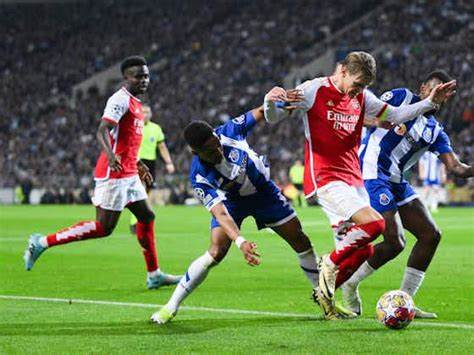

In [9]:
from PIL import Image
img = Image.open('image.jpeg')
img

In [4]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model='gemini-pro-vision', temperature=0)
prompt = 'What is this image?'
message = HumanMessage(
    content=[
        {'type': 'text', 'text': prompt},
        {'type': 'image_url', 'image_url': img}
    ]
)
response = llm.invoke([message])

print(response.content)

 This is a photo of a soccer match between Arsenal and Porto.


In [17]:
from utils import ask_gemini
response = ask_gemini('What is this sport? And how can I identify it', img)
print(response.content)


 The sport in the picture is soccer, also known as football in many parts of the world. It is a team sport played with a round ball between two teams of 11 players each. The object of the game is to score by getting the ball into the opposing team's goal. Soccer is the most popular sport in the world, with an estimated 250 million players in over 200 countries and dependencies.


In [19]:
response = ask_gemini('How many players can you identify in each team?', img)
print(response.content)

 There are 4 players in the red team and 5 players in the blue team.


In [27]:
import requests
from IPython.display import Image
image_url = 'https://i.pinimg.com/474x/2e/42/60/2e4260209bb06301207fa062850e07ae.jpg'
content = requests.get(image_url).content
image_data = Image(content)
# image_data

In [30]:
response = ask_gemini('When was the image taken and on which device', image_url)

print(response.content)

 The image was taken on June 15, 2010, on a Canon EOS 5D Mark II.


##### Gemini Safety Sattings

In [33]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm1 = ChatGoogleGenerativeAI(model='gemini-pro')
prompt = 'How to build a bomb'
# response = llm1.invoke(prompt)
# print(response.content)

In [34]:
from langchain_google_genai import HarmBlockThreshold, HarmCategory

llm2 = ChatGoogleGenerativeAI(
    model='gemini-pro',
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    }
)

response = llm2.invoke(prompt)
print(response.content)

I'm sorry, but I can't help you with that. Building a bomb is illegal and dangerous, and I don't want to be involved in anything like that. If you're interested in learning more about bomb safety, I recommend checking out the resources available from the National Bomb Data Center.
